# Data ingestion

In [13]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
os.getcwd()

'/Users/nathabit/Desktop/applied_discount_code_analysis/applied_discount_analysis/notebooks'

In [12]:
path=os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/raw_data.csv'))
coupon_data = pd.read_csv(path)

/var/folders/pn/pclby9617131bypw8s71537r0000gn/T/ipykernel_66375/3800363859.py:2: DtypeWarning: Columns (34,36,38,39,40,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  coupon_data = pd.read_csv(path)


In [14]:
coupon_data.shape

(2841074, 47)

In [15]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [16]:
coupon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841074 entries, 0 to 2841073
Data columns (total 47 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          int64  
 1   discount_code               object 
 2   applied_count               int64  
 3   failed                      bool   
 4   failed_reason               object 
 5   created_at                  object 
 6   updated_at                  object 
 7   cart_id                     int64  
 8   checkout_id                 float64
 9   token                       object 
 10  subtotal_price              float64
 11  total_price                 float64
 12  order_name                  object 
 13  is_payment_online           bool   
 14  verified_cart               bool   
 15  final_subtotal_price        float64
 16  final_total_price           float64
 17  cart_state                  object 
 18  final_discount              float64
 19  final_shipping       

# Coupon Success vs. Failure Rate

In [17]:
total_coupon_applied= len(coupon_data)
print(total_coupon_applied)

2841074


In [18]:
total_coupon_failed = len(coupon_data[coupon_data['failed']==True])
print(total_coupon_failed)

568802


In [19]:
# Step 1: Coupon Success vs. Failure Rate
failure_rate = round((total_coupon_failed / total_coupon_applied) * 100, 2)
print(failure_rate)

20.02


## Identify Most Common Failure Reasons

In [20]:
# Count occurrences of each failure reason
failure_reasons = coupon_data[coupon_data['failed'] == True]['failed_reason'].value_counts(normalize=True) * 100

# Convert to DataFrame
failure_reasons_df = failure_reasons.reset_index()
failure_reasons_df.columns = ['Failure Reason', 'Failure Percentage']

In [21]:
failure_reasons_df

,Failure Reason,Failure Percentage
0,You are not eligible for this discount,19.481823
1,Discount code is valid for a minimum ₹699.0 ca...,16.181378
2,Discount code is valid for a minimum ₹799.0 ca...,10.132700
3,Discount code is valid for a minimum ₹699 cart...,8.535659
4,Invalid discount code,6.590167
...,...,...
77,Discount code is valid for a minimum Rs.599.0 ...,0.000176
78,Please add minimum 749.0 items to avail this d...,0.000176
79,Discount code is valid for a minimum ₹750.0 ca...,0.000176
80,Discount code is valid for a cart having minim...,0.000176


### Top 3 coupon code used for failure reason.

In [22]:
# Step 1: Get top 3 coupon codes per failure reason
failed_coupons = coupon_data[coupon_data['failed'] == True]

# Group and count
grouped = failed_coupons.groupby(['failed_reason', 'discount_code']).size().reset_index(name='count')

# Sort and get top 3 per failure reason
top3 = grouped.sort_values(['failed_reason', 'count'], ascending=[True, False])
top3 = top3.groupby('failed_reason').head(3)

# Step 2: Aggregate top 3 coupon codes and counts as lists or strings
aggregated = top3.groupby('failed_reason').agg({
    'discount_code': lambda x: ', '.join(x),
    'count': lambda x: ', '.join(map(str, x))
}).reset_index()

aggregated.columns = ['Failure Reason', 'Top 3 Coupon Codes', 'Top 3 Coupon Counts']

# Step 3: Merge with your original failure_reasons_df
final_df = failure_reasons_df.merge(aggregated, on='Failure Reason', how='left')

# Optional: Sort by failure percentage descending
final_df = final_df.sort_values('Failure Percentage', ascending=False).reset_index(drop=True)

In [23]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [24]:
final_df.head(10)

,Failure Reason,Failure Percentage,Top 3 Coupon Codes,Top 3 Coupon Counts
0,You are not eligible for this discount,19.481823,"NEWHABIT50, FLAT20, ABFLAT50P","62518, 28343, 5463"
1,Discount code is valid for a minimum ₹699.0 ca...,16.181378,"NEWHABIT50, ZOMANAT50, NHBDAY50","66431, 11073, 5500"
2,Discount code is valid for a minimum ₹799.0 ca...,10.132700,"NEWHABIT50, HOLI50, MONSOON50","8780, 6068, 5790"
3,Discount code is valid for a minimum ₹699 cart...,8.535659,"NEWHABIT50, FRESH35, FREESPA","25790, 22189, 360"
4,Invalid discount code,6.590167,"NEWHABIT, NEWHABBIT50, NETHABIT50","1303, 1153, 650"
5,Discount code is valid for a minimum ₹599.0 ca...,6.390625,"FLAT20, FREEHANDMALAI, NUTRILOVE20","24336, 11816, 198"
6,Discount Code is not active,5.735564,"MONSOON50, NY2025, WINTER50","6054, 4953, 3947"
7,Discount code has already been used,3.952694,"NEWHABIT50, NHCREDOFS, EX3020","18254, 788, 701"
8,Discount Code is not applicable on above products,3.865669,"NEWHABIT50, FREEHANDMALAI, FRESH35","3124, 2143, 1727"
9,Discount code is valid for a minimum ₹499.0 ca...,3.686344,"FREEUBTAN, FREEHANDMALAI, FREEMALAI","12804, 7472, 583"


In [28]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'01_failure_reason.csv')
final_df.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


##  Failure Rate by Discount Type

In [29]:
coupon_data['discount_type'].value_counts()

discount_type
percentage      2271553
fixed_amount      80577
Name: count, dtype: int64

#### Customer more focused on discount on sub_total_price not on getting free product. 
#### And a business we should need to find a way where customer more focussed on our new product.

In [30]:
# Count failures by discount type
failure_by_type = coupon_data.groupby('discount_type')['failed'].mean() * 100

# Convert to DataFrame
failure_by_type_df = failure_by_type.reset_index()
failure_by_type_df.columns = ['Discount Type', 'Failure Rate (%)']


In [31]:
# Display results for complete data set
failure_by_type_df

,Discount Type,Failure Rate (%)
0,fixed_amount,9.645432
1,percentage,10.444528


## For each coupon failure rate

In [32]:
# Group by coupon code and failure reason
failure_by_coupon = coupon_data.groupby(['discount_code'])['failed'].agg(['count', 'sum'])

# Calculate failure rate
failure_by_coupon['failure_rate'] = (failure_by_coupon['sum'] / failure_by_coupon['count']) * 100

# Rename columns
failure_by_coupon = failure_by_coupon.rename(columns={'count': 'total_attempts', 'sum': 'total_failures'})

# Sort by failure rate (descending)
failure_by_coupon = failure_by_coupon.sort_values(by='failure_rate', ascending=False)

# Reset index for readability
failure_by_coupon = failure_by_coupon.reset_index()

In [33]:
total_coupon_code_used = len(failure_by_coupon)
print(total_coupon_code_used)

47317


In [34]:
failure_by_coupon

,discount_code,total_attempts,total_failures,failure_rate
0,!,12,12,100.0
1,NEW40,8,8,100.0
2,NEW150,1,1,100.0
3,NEW1HABIT50,1,1,100.0
4,NEW20,83,83,100.0
...,...,...,...,...
47312,GPAY50-G4ZDEMBSHE,1,0,0.0
47313,NHCRBOGO-GMZDQOBXHE4A,2,0,0.0
47314,NHCRBOGO-GMZDSMBRGQ4A,2,0,0.0
47315,GPAY50-G4ZDCOBXGU,2,0,0.0


In [35]:
failure_by_coupon['failure_rate'].value_counts()

failure_rate
0.000000      35159
100.000000    11589
50.000000       194
33.333333       122
25.000000        45
              ...  
44.444444         1
44.824482         1
45.141176         1
45.454545         1
24.951630         1
Name: count, Length: 138, dtype: int64

In [36]:
# Count failure reasons
failure_reasons = coupon_data[coupon_data['failed'] == True].groupby('failed_reason')['failed'].count()

# Sort by most common failure reasons
failure_reasons = failure_reasons.sort_values(ascending=False)

In [37]:
failure_reasons.sum()

np.int64(568802)

In [40]:
failure_reasons.head(15).sum()/failure_reasons.sum()

np.float64(0.9601759487484222)

#### Top 15 failure reason contributing to 96% failure coupon code.

In [48]:
type(failure_reasons)

pandas.core.series.Series

In [51]:
failure_df=failure_reasons.reset_index()

In [52]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'02_failure_reason_counts.csv')
failure_df.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


In [53]:
failure_reasons.head(15)

failed_reason
You are not eligible for this discount                         110813
Discount code is valid for a minimum ₹699.0 cart value only     92040
Discount code is valid for a minimum ₹799.0 cart value only     57635
Discount code is valid for a minimum ₹699 cart value only       48551
Invalid discount code                                           37485
Discount code is valid for a minimum ₹599.0 cart value only     36350
Discount Code is not active                                     32624
Discount code has already been used                             22483
Discount Code is not applicable on above products               21988
Discount code is valid for a minimum ₹499.0 cart value only     20968
Discount code is valid for a minimum ₹899.0 cart value only     19629
Discount code is valid for a minimum ₹499 cart value only       14064
Discount code is valid for a minimum ₹1199 cart value only      12033
Discount code is valid for a minimum ₹599 cart value only       11356
Discou

In [54]:
import pandas as pd

# Convert 'created_at' to datetime with explicit format handling
coupon_data['created_at'] = pd.to_datetime(coupon_data['created_at'], errors='coerce', utc=True)

# Extract year and month
coupon_data['year_month'] = coupon_data['created_at'].dt.to_period('M')

# Print sample data to confirm conversion
print(coupon_data[['created_at', 'year_month']].head())

                        created_at year_month
0 2024-03-31 18:30:06.797553+00:00    2024-03
1 2024-03-31 18:30:20.549031+00:00    2024-03
2 2024-03-31 18:30:34.220576+00:00    2024-03
3 2024-03-31 18:31:18.890836+00:00    2024-03
4 2024-03-31 18:31:21.579114+00:00    2024-03


In [55]:
print(coupon_data['created_at'].dtype)
print(coupon_data['created_at'].head(10))

datetime64[ns, UTC]
0   2024-03-31 18:30:06.797553+00:00
1   2024-03-31 18:30:20.549031+00:00
2   2024-03-31 18:30:34.220576+00:00
3   2024-03-31 18:31:18.890836+00:00
4   2024-03-31 18:31:21.579114+00:00
5   2024-03-31 18:31:23.255674+00:00
6   2024-03-31 18:31:38.295608+00:00
7   2024-03-31 18:31:43.392674+00:00
8   2024-03-31 18:31:51.412035+00:00
9   2024-03-31 18:31:55.386483+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [56]:
# Group by failure reason and month
failure_monthly = coupon_data[coupon_data['failed'] == True].groupby(['year_month', 'failed_reason']).size().reset_index(name='failure_count')

# Pivot the table to show failure reasons as columns (Optional, for readability)
failure_pivot = failure_monthly.pivot(index='year_month', columns='failed_reason', values='failure_count').fillna(0)

In [57]:
failure_pivot= failure_pivot.T

In [58]:
failure_pivot.columns

PeriodIndex(['2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
             '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02',
             '2025-03', '2025-04'],
            dtype='period[M]', name='year_month')

In [59]:
# Add a new column 'total' that sums all values row-wise
failure_pivot['total'] = failure_pivot.sum(axis=1)

In [77]:
# Sort by 'total' in descending order and get top 15 rows
top_15_failures = failure_pivot.sort_values(by='total', ascending=False).head(15)


In [78]:
top_15_failures_reindexed=top_15_failures.reset_index()

In [79]:
switched_path = os.path.abspath(os.path.join(os.getcwd(),'..','artifacts/insights'))
os.makedirs(switched_path,exist_ok=True)
save_fath = os.path.join(switched_path,'03_month_wise_failure_reason.csv')
top_15_failures_reindexed.to_csv(save_fath,index=False)
print("Data saved successfully")

Data saved successfully


In [82]:
import os
import matplotlib.pyplot as plt

# Set the directory path to save plots
switched_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'artifacts/visualization'))
os.makedirs(switched_path, exist_ok=True)

# Prepare the DataFrame: transpose and drop 'total'
top_15_failures_T = top_15_failures.drop(columns=['total']).T

# Convert index to formatted strings (e.g., if index is datetime or float)
top_15_failures_T.index = top_15_failures_T.index.map(str)

# Loop through each failure reason and generate individual plots
for failure_reason in top_15_failures_T.columns:
    plt.figure(figsize=(10, 5))
    
    # Extract x and y values
    x_vals = top_15_failures_T.index
    y_vals = top_15_failures_T[failure_reason].values
    
    # Plot the data
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', label=failure_reason)

    # Plot customization
    plt.xticks(rotation=45)
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Failures")
    plt.title(f"Trend for: {failure_reason}")
    plt.grid(True)
    
    # Create a safe filename
    safe_filename = f"{failure_reason.replace('/', '_').replace(' ', '_')}_trend.png"
    save_path = os.path.join(switched_path, safe_filename)

    # Save and close the figure
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

print(f"✅ All failure trend plots saved to: {switched_path}")


✅ All failure trend plots saved to: /Users/nathabit/Desktop/applied_discount_code_analysis/applied_discount_analysis/artifacts/visualization


<Figure size 1200x600 with 0 Axes>

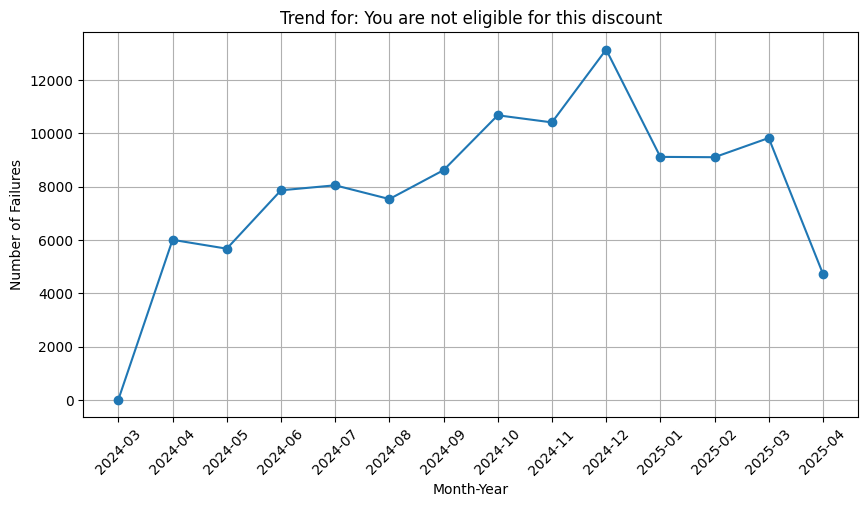

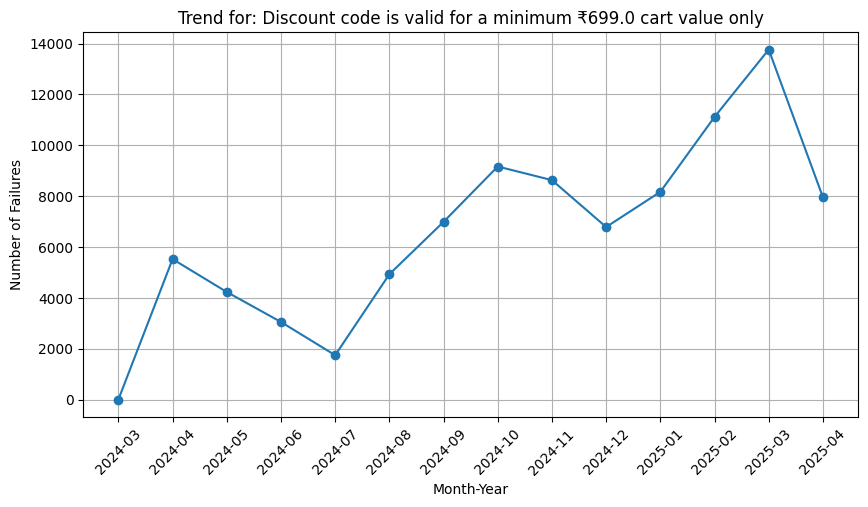

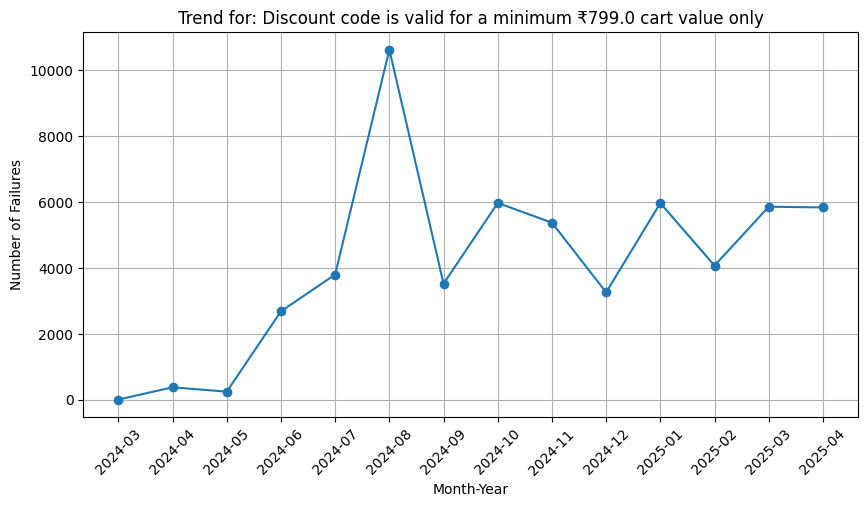

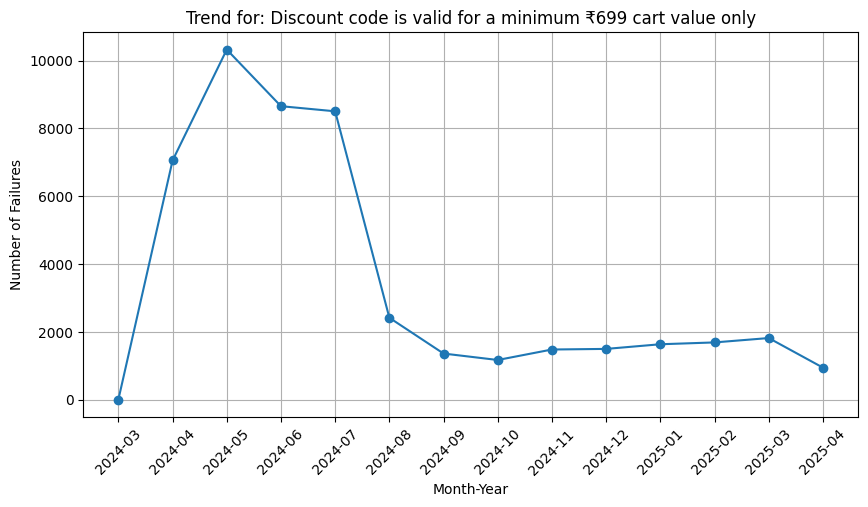

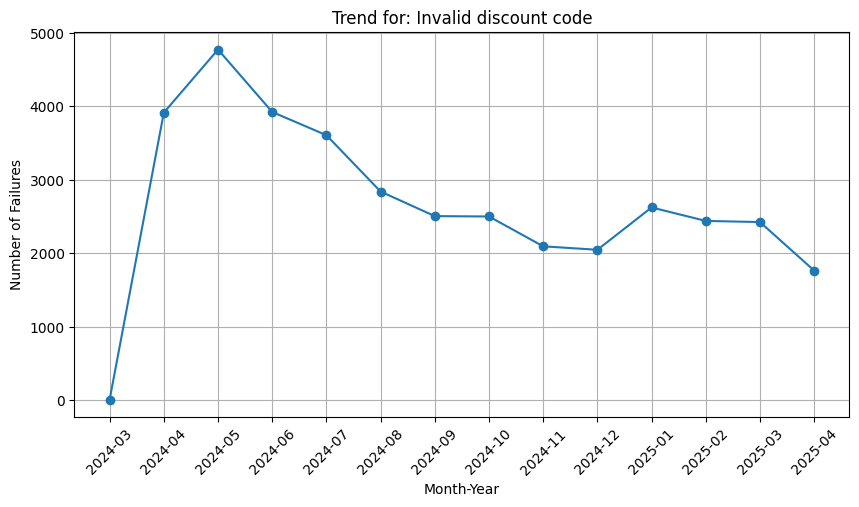

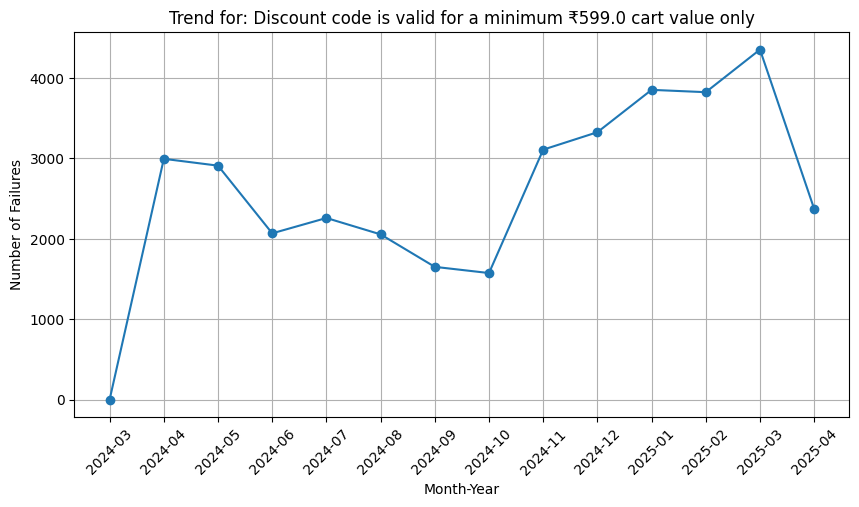

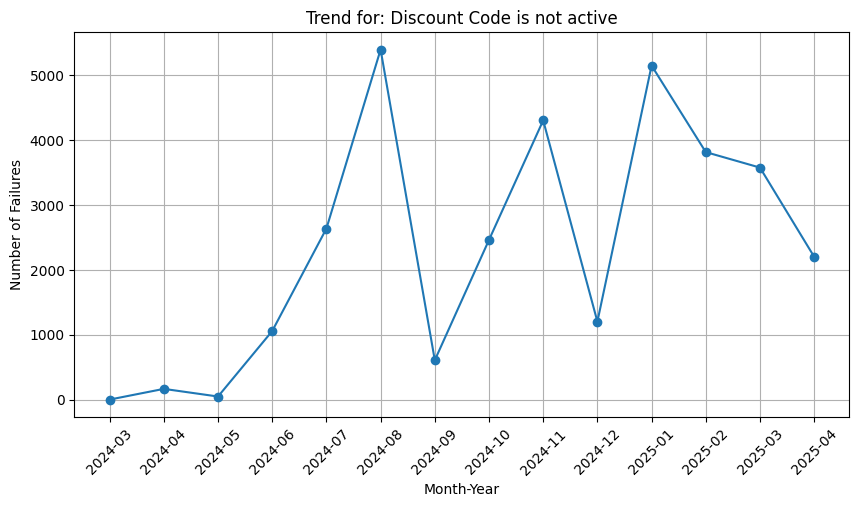

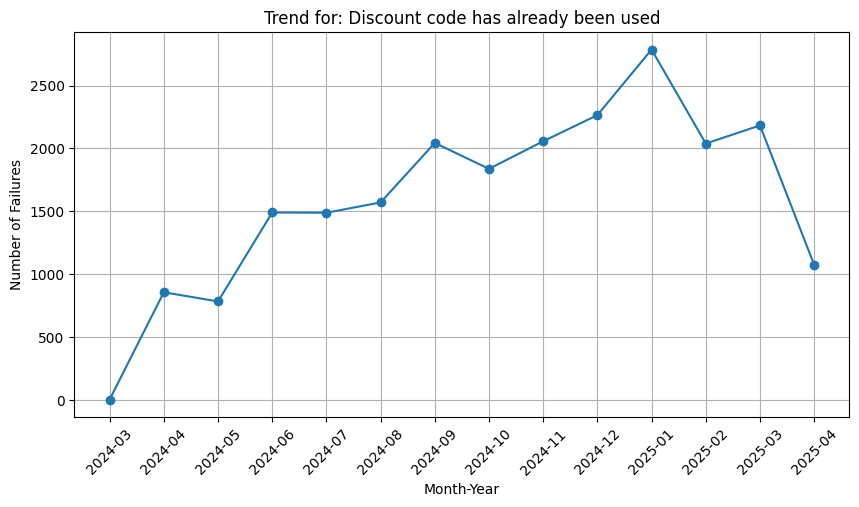

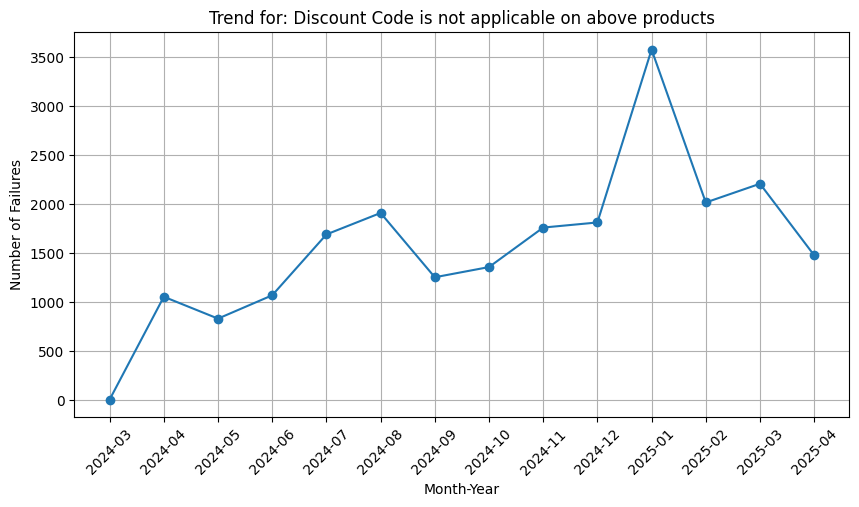

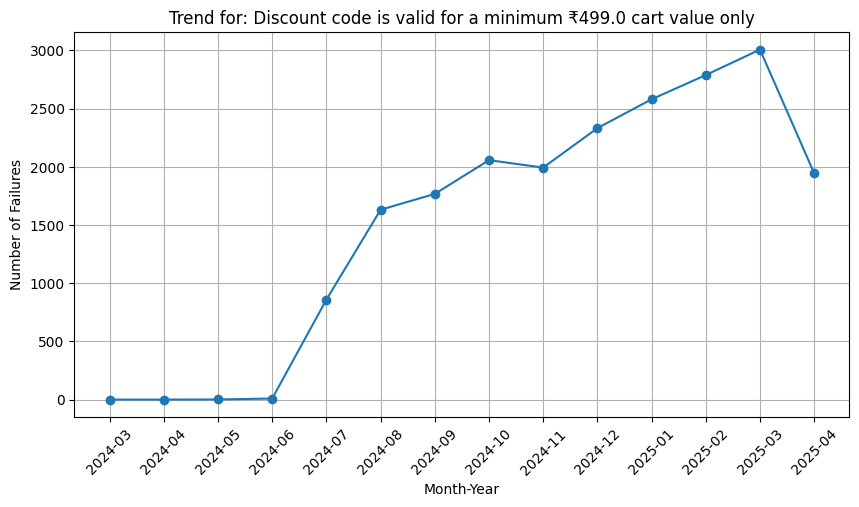

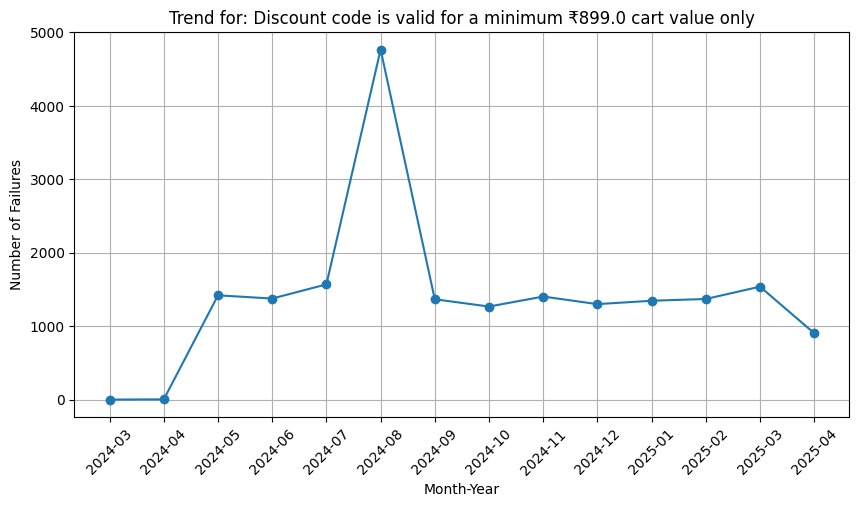

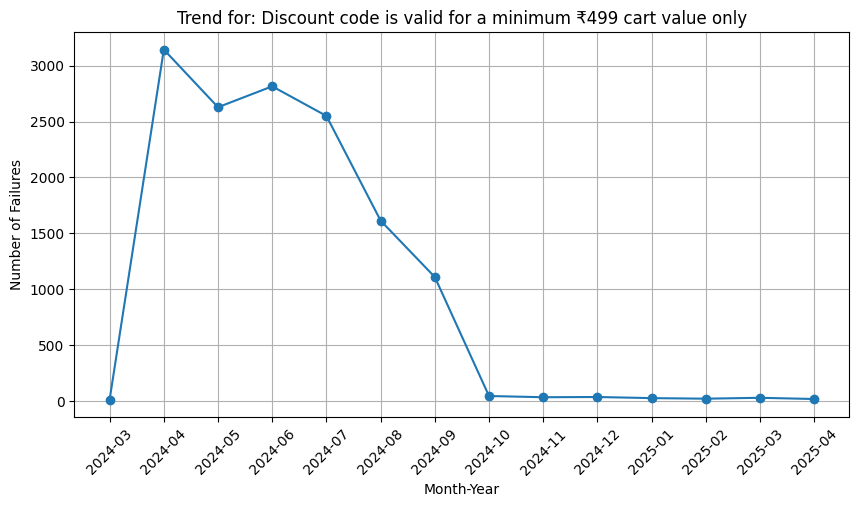

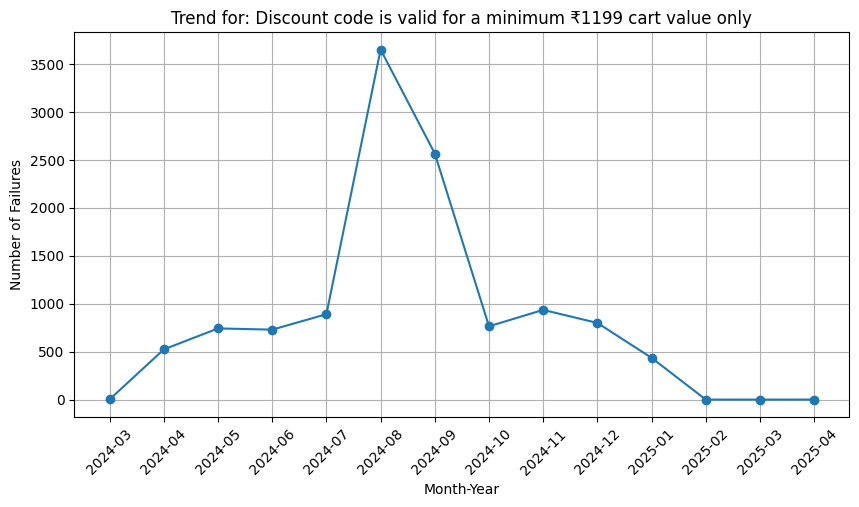

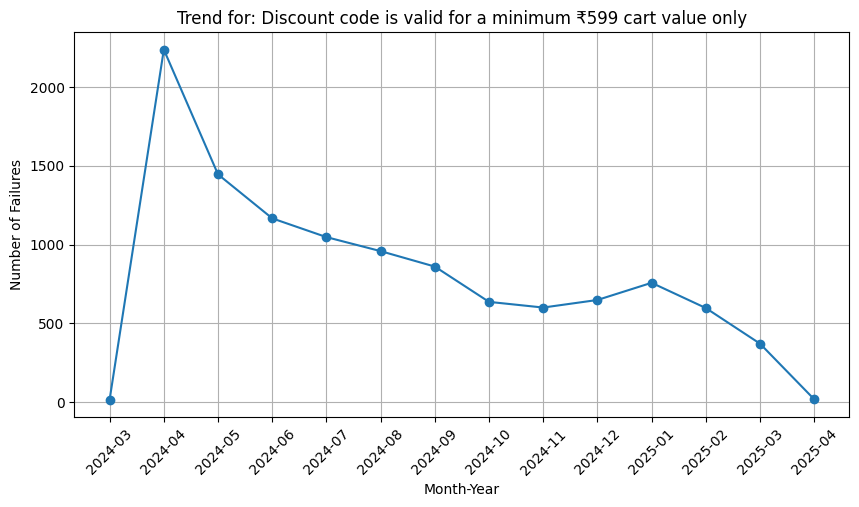

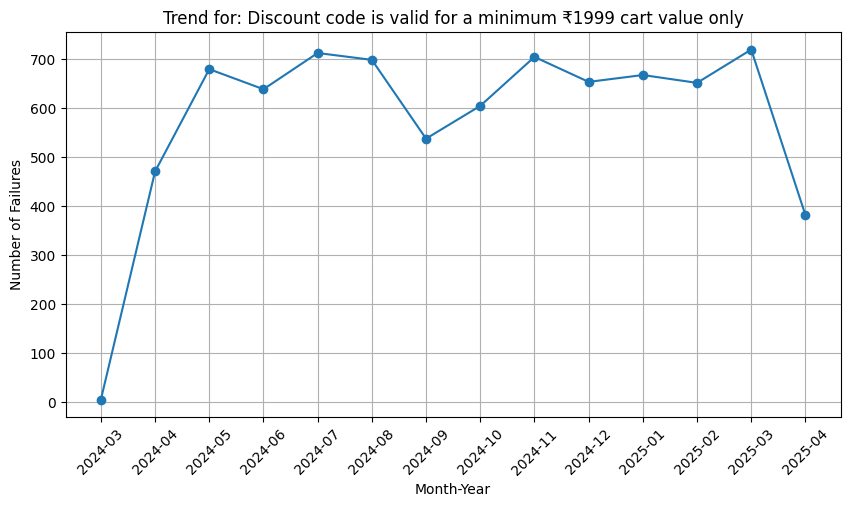

In [80]:
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))
# Transpose DataFrame to have months as rows and failure reasons as columns
top_15_failures_T = top_15_failures.drop(columns=['total']).T



# Loop through each failure reason and plot separately
for failure_reason in top_15_failures_T.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(top_15_failures_T.index.astype(str), top_15_failures_T[failure_reason], marker='o', linestyle='-')
    
    # Customizations
    plt.xticks(rotation=45)
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Failures")
    plt.title(f"Trend for: {failure_reason}")
    plt.grid(True)
    
    # Show the plot
    plt.show()


## Abondonment cart rate

In [83]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()
coupon_data['cart_state'].value_counts()
# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()
# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)
print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")

Total Carts with Coupons: 1051863
Abandoned Carts: 523035
Cart Abandonment Rate: 49.72%


In [84]:
# Count total carts with coupons
total_carts_with_coupons = coupon_data[coupon_data['discount_code'].notna()]['cart_id'].nunique()

# Count abandoned carts using the cart_state column
abandoned_carts = coupon_data[(coupon_data['discount_code'].notna()) & 
                              (coupon_data['cart_state'] == 'Created')]['cart_id'].nunique()

# Calculate abandonment rate
abandonment_rate = round((abandoned_carts / total_carts_with_coupons) * 100, 2)

# Calculate abandoned cart revenue
abandoned_cart_revenue = coupon_data[(coupon_data['discount_code'].notna()) & 
                                     (coupon_data['cart_state'] == 'Created')]['mrp_total'].sum()

print(f"Total Carts with Coupons: {total_carts_with_coupons}")
print(f"Abandoned Carts: {abandoned_carts}")
print(f"Cart Abandonment Rate: {abandonment_rate}%")
print(f"Abandoned Cart Revenue: ₹{abandoned_cart_revenue:,.2f}")  # Formatting for better readability


Total Carts with Coupons: 1051863
Abandoned Carts: 523035
Cart Abandonment Rate: 49.72%
Abandoned Cart Revenue: ₹930,821,679.77


In [85]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'mrp_total', 'mrp_items_total',
       'show_on_only_promotion_qty', 'show_on_app', 'year_month'],
      dtype='object')

In [89]:
# Step 1: Filter only 'Created' cart states with non-null coupon codes
abandoned_carts_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                 (coupon_data['discount_code'].notna())]

# Step 2: Sort by cart_id and created_at in descending order (latest application first)
abandoned_carts_df = abandoned_carts_df.sort_values(by=['cart_id', 'created_at'], ascending=[True, False])

# Step 3: Group by cart_id and aggregate the coupon codes into a list
cart_coupon_list = abandoned_carts_df.groupby('cart_id')['discount_code'].agg(list).reset_index()

# Step 4: Add cart_state as a column (it’ll be "Created" for all)
cart_coupon_list['cart_state'] = 'Created'

# Optional: Rename columns for clarity
cart_coupon_list.columns = ['cart_id', 'coupon_codes_applied', 'cart_state']


In [90]:
cart_coupon_list

,cart_id,coupon_codes_applied,cart_state
0,9669611,[FREEMALAI],Created
1,10852987,[FREESPA],Created
2,12305308,[NEWHABIT50],Created
3,12347809,[FREEHANDMALAI],Created
4,12380903,[FREESALT600],Created
...,...,...,...
523030,38380797,[NEWHABIT50],Created
523031,38380916,"[NEWHABIT50, FRESH35]",Created
523032,38380939,[FRESH35],Created
523033,38380966,"[NEWHABIT50, FREEHANDMALAI]",Created


In [91]:
from collections import Counter

# Step 1: Filter only carts in 'Created' state with a coupon code
abandoned_carts_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                 (coupon_data['discount_code'].notna())]

# Step 2: Sort by cart_id and created_at (latest coupon on top)
abandoned_carts_df = abandoned_carts_df.sort_values(by=['cart_id', 'created_at'], ascending=[True, False])

# Step 3: Group by cart_id and aggregate the coupon codes into a list
cart_coupon_group = abandoned_carts_df.groupby('cart_id')['discount_code'].agg(list).reset_index()

# Step 4: Create coupon code counts as dictionaries per cart_id (in descending order of frequency within list)
cart_coupon_group['coupon_code_counts'] = cart_coupon_group['discount_code'].apply(
    lambda codes: dict(Counter(codes))
)

# Step 5: Add cart_state column
cart_coupon_group['cart_state'] = 'Created'

# Optional: Rename coupon list column for clarity
cart_coupon_group.rename(columns={'discount_code': 'coupon_codes_applied'}, inplace=True)

In [92]:
cart_coupon_group

,cart_id,coupon_codes_applied,coupon_code_counts,cart_state
0,9669611,[FREEMALAI],{'FREEMALAI': 1},Created
1,10852987,[FREESPA],{'FREESPA': 1},Created
2,12305308,[NEWHABIT50],{'NEWHABIT50': 1},Created
3,12347809,[FREEHANDMALAI],{'FREEHANDMALAI': 1},Created
4,12380903,[FREESALT600],{'FREESALT600': 1},Created
...,...,...,...,...
523030,38380797,[NEWHABIT50],{'NEWHABIT50': 1},Created
523031,38380916,"[NEWHABIT50, FRESH35]","{'NEWHABIT50': 1, 'FRESH35': 1}",Created
523032,38380939,[FRESH35],{'FRESH35': 1},Created
523033,38380966,"[NEWHABIT50, FREEHANDMALAI]","{'NEWHABIT50': 1, 'FREEHANDMALAI': 1}",Created


In [93]:
# Step 1: Filter for only 'Created' carts with valid coupon codes
abandoned_coupons_df = coupon_data[(coupon_data['cart_state'] == 'Created') &
                                   (coupon_data['discount_code'].notna())]

# Step 2: Group by coupon_code and count how many times each one was used
coupon_code_counts = abandoned_coupons_df['discount_code'].value_counts().reset_index()

# Step 3: Rename columns for clarity
coupon_code_counts.columns = ['coupon_code', 'count']

# Step 4: Optional - Add cart_state column
coupon_code_counts['cart_state'] = 'Created'

# Step 5: Sort by count descending
coupon_code_counts = coupon_code_counts.sort_values(by='count', ascending=False)

# Display top 10
print(coupon_code_counts.head(10))


     coupon_code   count cart_state
0     NEWHABIT50  215874    Created
1        FREESPA  122357    Created
2        FRESH35  120384    Created
3  FREEHANDMALAI  111772    Created
4      FREECOMBO   83281    Created
5      FREEUBTAN   61246    Created
6       10OFFNOW   47971    Created
7         FLAT20   41650    Created
8       NHBDAY50   28314    Created
9      MONSOON50   27740    Created


In [87]:
# Filter only carts where a discount code was applied and state is 'Created' (abandoned)
abandoned_carts_df = coupon_data[(coupon_data['discount_code'].notna()) &
                                 (coupon_data['cart_state'] == 'Created')]

# Group by cart and coupon code to count usage per cart
cart_coupon_counts = abandoned_carts_df.groupby(['cart_id', 'discount_code']) \
                                       .size() \
                                       .reset_index(name='count')

# Optional: Sort by count or cart_id for easier inspection
cart_coupon_counts = cart_coupon_counts.sort_values(by=['cart_id', 'count'], ascending=[True, False])

cart_coupon_counts.head(10)  # Sample output


,cart_id,discount_code,count
0,9669611,FREEMALAI,1
1,10852987,FREESPA,1
2,12305308,NEWHABIT50,1
3,12347809,FREEHANDMALAI,1
4,12380903,FREESALT600,1
5,13322764,ABFLAT50S,1
6,13382456,ABFLAT50S,1
7,13934317,ABFLAT50P,1
8,13944569,ABFLAT50P,1
9,14194106,ABFLAT50P,1


In [88]:
cart_coupon_counts.shape

(946992, 3)

In [148]:
x = []
for i in coupon_data.columns:
    x.append((i, coupon_data[i].isna().sum()))  # Append as a tuple

# Convert to DataFrame
null_df = pd.DataFrame(x, columns=['Column Name', 'Null Count'])

In [149]:
null_df.to_csv('nulldf.csv')

In [150]:
x = coupon_data.iloc[:, 0:34]

In [151]:
column_to_drop = ['checkout_id','recommended_discount_id','updated_at']
x.drop(columns=column_to_drop,inplace=True)

In [152]:
x.shape

(2646376, 31)

In [153]:
x.dropna(subset=['discount_code'], inplace=True)

In [154]:
x.shape

(2645208, 31)

In [155]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app',
       'year_month'],
      dtype='object')

In [156]:
with open("coupon_data_summary.txt", "w", encoding="utf-8") as f:
    for i in coupon_data.columns:
        f.write(f"{i}\n")
        f.write(f"{coupon_data[i].unique()}\n")
        f.write("-" * 50 + "\n")

In [93]:
# percentage of cart coverted into orders
y = coupon_data['cart_id'].nunique()
x = coupon_data[coupon_data['order_name'].notnull()]['cart_id'].nunique()
(x/y)*100

54.07874818973799

In [161]:
# Count unique discount codes per cart_id
coupon_counts = coupon_data.groupby('order_name')['discount_code'].nunique().reset_index()

# Rename column for clarity
coupon_counts.rename(columns={'discount_code': 'coupon_count'}, inplace=True)

# Sort by coupon_count in descending order
coupon_counts = coupon_counts.sort_values(by='coupon_count', ascending=False)

In [162]:
coupon_counts

,order_name,coupon_count
440803,NH-2614482,85
238881,NH-2321132,41
29921,NH-2021251,39
414918,NH-2577455,36
331119,NH-2459050,35
...,...,...
507108,NH-2710292,0
29277,NH-2020335,0
20137,NH-2007099,0
249905,NH-2338170,0


In [164]:
order_count = coupon_counts.groupby('coupon_count')['order_name'].count().reset_index()

# Rename column for clarity
order_count.rename(columns={'order_name': 'order_count'}, inplace=True)
# Sort by coupon_count in descending order
order_counts = order_count.sort_values(by='order_count', ascending=False)

In [166]:
coupon_data['order_name'].nunique()

528013

In [174]:
order_counts['order_count'].head(6).sum()

np.int64(523000)

In [175]:
order_counts.head(6)

,coupon_count,order_count
1,1,269745
2,2,124398
3,3,69042
4,4,35881
5,5,16691
6,6,7243


In [186]:
coupon_data.shape

(2646376, 45)

In [187]:
coupon_data.columns

Index(['id', 'discount_code', 'applied_count', 'failed', 'failed_reason',
       'created_at', 'updated_at', 'cart_id', 'checkout_id', 'token',
       'subtotal_price', 'total_price', 'order_name', 'is_payment_online',
       'verified_cart', 'final_subtotal_price', 'final_total_price',
       'cart_state', 'final_discount', 'final_shipping', 'outstation',
       'online_payment_attempted', 'utm_source', 'is_fast_checkout',
       'recommended_discount_id', 'temp_discount', 'discount_reason',
       'additional_off', 'additional_off_type', 'eligible_nat_cash',
       'discount_amount', 'discount_type', 'payment_charge',
       'promotion_discount_amount', 'recommend_discount_code', 'min_amount',
       'is_active', 'suggestion_amount_window', 'show_only_on_checkout',
       'background_color', 'image_url', 'show_on_new_website',
       'recommendation_tag', 'show_on_only_promotion_qty', 'show_on_app'],
      dtype='object')

In [188]:
coupon_data.sample()

,id,discount_code,applied_count,failed,failed_reason,created_at,updated_at,cart_id,checkout_id,token,...,min_amount,is_active,suggestion_amount_window,show_only_on_checkout,background_color,image_url,show_on_new_website,recommendation_tag,show_on_only_promotion_qty,show_on_app
2028751,3241177,FREECOMBO,2,False,NaN,2025-01-08 09:31:56.063081+00:00,2025-01-08 09:31:56.264619+00:00,34351145,NaN,PpFxYdx4eQGewa8A3OFr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
len(coupon_data['cart_id'].unique())

976378

In [222]:
import pandas as pd

# Ensure 'failed' is boolean, then convert to int
coupon_data['failed'] = coupon_data['failed'].astype(int)

# Grouping data per cart_id
result = coupon_data.groupby('cart_id').agg(
    total_coupons_applied=('discount_code', 'count'),
    total_coupons_failed=('failed', 'sum'),
    failed_coupon_position=('failed', lambda x: [i+1 for i, v in enumerate(x, start=1) if v == 1]),
    order_placed=('order_name', lambda x: 'Yes' if x.notna().any() else 'No'),
    revenue_generated=('final_total_price', 'sum'),
    discount_applied=('discount_amount', 'sum')
).reset_index()

In [223]:
result

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,0.0,0.0
1,10852987,1,0,[],No,0.0,0.0
2,12207885,1,1,[2],Yes,0.0,0.0
3,12305308,1,1,[2],No,0.0,0.0
4,12347809,1,0,[],No,0.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [207]:
len(result['cart_id'].unique())

976378

In [217]:
no_orders = result[result['order_placed']=='No']

In [221]:
no_orders

,cart_id,total_coupons_applied,total_coupons_failed,failed_coupon_position,order_placed,revenue_generated,discount_applied
0,9669611,1,0,[],No,882.0,0.0
1,10852987,1,0,[],No,947.0,0.0
3,12305308,1,1,[2],No,773.0,0.0
4,12347809,1,0,[],No,330.0,0.0
5,12380903,1,0,[],No,964.0,0.0
...,...,...,...,...,...,...,...
976373,37455507,1,1,[2],No,0.0,142.0
976374,37455510,1,0,[],No,0.0,220.0
976375,37455551,2,0,[],No,0.0,2140.0
976376,37455614,1,1,[2],No,0.0,236.0


In [211]:
result['failed_coupon_position'].value_counts()

failed_coupon_position
[]                       586296
[2]                      225245
[2, 3]                    40772
[3]                       36335
[4]                       16100
                          ...  
[7, 8, 12]                    1
[5, 6, 8, 13]                 1
[2, 7, 8, 11, 13]             1
[4, 7, 9, 12, 13, 15]         1
[8, 9, 10, 12]                1
Name: count, Length: 1311, dtype: int64